----------
## Review

Hi, my name is Daria! I'm reviewing your project. 

You can find my comments under the heading «Review». 
I’m using __<font color='green'>green</font>__ color if everything is done perfectly. Recommendations and remarks are highlighted in __<font color='blue'>blue</font>__. 
If the topic requires some extra work, the color will be  __<font color='red'>red</font>__. 

You did an outstanding data study! Every step was correct, the project is accepted. Good luck in future learning!

---------

### Project description

You are an analyst at a big online store. Together with the marketing
department, you've compiled a list of hypotheses that may help boost
revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the
results.

#### Step 1 - open data file and study the general information

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypotheses = pd.read_csv('datasets/hypotheses_us.csv')
hypotheses

,Hypothesis;Reach;Impact;Confidence;Effort
0,Add two new channels for attracting traffic. T...
1,Launch your own delivery service. This will sh...
2,Add product recommendation blocks to the store...
3,Change the category structure. This will incre...
4,Change the background color on the main page. ...
5,Add a customer review page. This will increase...
6,Show banners with current offers and sales on ...
7,Add a subscription form to all the main pages....
8,Launch a promotion that gives users discounts ...


----------
<font color='blue'>

## Review

You could use ``sep=';'`` parameter to correctly read this table :)   
    
</font>

---------

In [3]:
visitors = pd.read_csv('datasets/visits_us.csv')
#visitors.head(10)
visitors.tail(10)

,date,group,visits
52,2019-08-22,B,650
53,2019-08-23,B,546
54,2019-08-24,B,378
55,2019-08-25,B,679
56,2019-08-26,B,676
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [4]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [5]:
orders = pd.read_csv('datasets/orders_us.csv')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [7]:
orders['visitorId'].nunique()

1031

### Make sure to preprocess the data. There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B.

In [8]:
# group the visitors by number of unique groups
how_many_groups = orders.groupby(['visitorId'])['group'].nunique().reset_index()
how_many_groups.head()

,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [9]:
#users classified correctly
users_one_group = how_many_groups.query('group == 1').reset_index()
users_one_group.head()

,index,visitorId,group
0,0,5114589,1
1,1,6958315,1
2,3,11685486,1
3,4,39475350,1
4,5,47206413,1


In [10]:
#this shows that there are users in more than one group
users_multi_group = how_many_groups.query('group > 1').reset_index()
users_multi_group.head()

,index,visitorId,group
0,2,8300375,2
1,44,199603092,2
2,51,232979603,2
3,55,237748145,2
4,66,276558944,2


In [11]:
#how many users are classified incorrectly
users_multi_group.count()

index        58
visitorId    58
group        58
dtype: int64

In [12]:
users_multi_group[users_multi_group['visitorId'] == 2780786433]

,index,visitorId,group
35,677,2780786433,2


In [13]:
orders[orders['visitorId']==2780786433]

,transactionId,visitorId,date,revenue,group
304,609915801,2780786433,2019-08-28,20.5,A
548,430186476,2780786433,2019-08-29,25.3,A
857,847315305,2780786433,2019-08-27,10.3,B


In [14]:
#select only users that have more than 2 groups. Make a list to use in the function below.
list_of_users = users_multi_group[users_multi_group['group']>1]['visitorId'].to_list()
list_of_users[:10]

[8300375,
 199603092,
 232979603,
 237748145,
 276558944,
 351125977,
 393266494,
 457167155,
 471551937,
 477780734]

In [15]:
#create a df of users with their revenue by group. Use this df to select the correct group for user
#based on max revenue
rev_by_group = orders.groupby(['visitorId','group'])['revenue'].sum().reset_index()
rev_by_group.head()

,visitorId,group,revenue
0,5114589,B,10.8
1,6958315,B,25.9
2,8300375,A,30.5
3,8300375,B,165.7
4,11685486,A,100.4


In [16]:
#let's check one user from the list with 2 groups. 
rev_by_group[rev_by_group['visitorId']==2780786433] 

,visitorId,group,revenue
712,2780786433,A,45.8
713,2780786433,B,10.3


In [17]:
#find the group with max revenue using idxmax function

# .idxmax returns the first occurrence of the maximum value.

#revenue.loc[revenue['revenue'].idxmax()]['group']

In [18]:
len(list_of_users)

58

In [19]:
#just check how it returns our list
for i in list_of_users:
    print(rev_by_group[rev_by_group['visitorId']==i])

   visitorId group  revenue
2    8300375     A     30.5
3    8300375     B    165.7
    visitorId group  revenue
45  199603092     A    311.9
46  199603092     B     55.7
    visitorId group  revenue
53  232979603     A      5.9
54  232979603     B     45.6
    visitorId group  revenue
58  237748145     A     62.0
59  237748145     B    120.2
    visitorId group  revenue
70  276558944     A     80.7
71  276558944     B    190.0
    visitorId group  revenue
89  351125977     A     70.0
90  351125977     B    235.6
     visitorId group  revenue
103  393266494     A    335.5
104  393266494     B    526.1
     visitorId group  revenue
121  457167155     A     25.9
122  457167155     B    136.7
     visitorId group  revenue
127  471551937     A    355.1
128  471551937     B     55.2
     visitorId group  revenue
131  477780734     A    115.3
132  477780734     B     60.2
     visitorId group  revenue
202  818047933     A     55.2
203  818047933     B     10.2
     visitorId group  revenue
2

In [20]:
#get everything into one function
def correct_group(row):
    visitor=row['visitorId']
    correct_group=row['group']
    if visitor in list_of_users:
        revenue=rev_by_group[rev_by_group['visitorId']==visitor]
        return revenue.loc[revenue['revenue'].idxmax()]['group']
    else:
        return correct_group

In [21]:
orders['correct_group']=orders.apply(correct_group,axis=1)
orders

,transactionId,visitorId,date,revenue,group,correct_group
0,3667963787,3312258926,2019-08-15,30.4,B,B
1,2804400009,3642806036,2019-08-15,15.2,B,B
2,2961555356,4069496402,2019-08-15,10.2,A,B
3,3797467345,1196621759,2019-08-15,155.1,B,B
4,2282983706,2322279887,2019-08-15,40.5,B,B
...,...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B,B
1193,2203539145,370388673,2019-08-14,50.1,A,A
1194,1807773912,573423106,2019-08-14,165.3,A,A
1195,1947021204,1614305549,2019-08-14,5.5,A,B


----------
<font color='green'>

## Review

Good work! You could also just drop these rows, since it's only 5% of our data :)
    
</font>

---------

In [22]:
#check that we replaced all 58 users 
orders[orders['group']!=orders['correct_group']]['visitorId'].nunique()

58

In [23]:
#let's recheck our sample user
orders[orders['visitorId']==2780786433]

,transactionId,visitorId,date,revenue,group,correct_group
304,609915801,2780786433,2019-08-28,20.5,A,A
548,430186476,2780786433,2019-08-29,25.3,A,A
857,847315305,2780786433,2019-08-27,10.3,B,A


In [24]:
# this is the visitor with the most in A and B and one of the outlier / largest orders
orders[orders['visitorId']==4256040402]

,transactionId,visitorId,date,revenue,group,correct_group
60,1421016313,4256040402,2019-08-16,875.5,B,B
114,1120327437,4256040402,2019-08-01,90.2,A,B
187,2048878902,4256040402,2019-08-17,25.8,A,B
253,1610091760,4256040402,2019-08-23,265.8,A,B
263,2575861846,4256040402,2019-08-18,170.8,B,B
588,3700356838,4256040402,2019-08-20,275.5,A,B
873,2519737434,4256040402,2019-08-08,900.7,B,B
901,3402467119,4256040402,2019-08-27,30.1,A,B
1018,1415970216,4256040402,2019-08-31,80.5,A,B
1019,453824282,4256040402,2019-08-31,30.5,B,B


In [25]:
group_A = rev_by_group.query('group == "A"')
#group_A

In [26]:
group_A['revenue'].sum()

64554.9

In [27]:
group_A['revenue'].mean()

128.33976143141163

In [28]:
group_B = rev_by_group.query('group == "B"')
#group_B

In [29]:
group_B['revenue'].sum()

92840.6

In [30]:
group_B['revenue'].mean()

158.43105802047788

In [31]:
correct_group_A = orders.query('correct_group == "A"')
#correct_group_A

In [32]:
correct_group_A['revenue'].sum()

64422.7

In [33]:
correct_group_A['revenue'].mean()

117.34553734061932

In [34]:
correct_group_B = orders.query('correct_group == "B"')
#correct_group_B

In [35]:
correct_group_B['revenue'].sum()

92972.79999999999

In [36]:
correct_group_B['revenue'].mean()

143.47654320987635

group_A revenue is: 64554.90    
mean is  128.33
    
correct_group_A revenue is: 64422.70    
mean is  117.34
    
    
group_B revenue is: 92840.60     
mean is  158.43
    
correct_group_B revenue is: 92972.80    
mean is  143.47

Group B has greater revenue even after correcting the mis-classified users. After plotting new graphs to use correct_A and correct_B, I noticed the graphs looked the same. I came back to this section and found out the total revenue by group, before and after the correction. Overall, 132.20 dollars was transferred to group B. In this case, we have proven the mistake in the dataset was insignificant.

----------
<font color='green'>

## Review

Great that you've checked that!
    
</font>

---------

## Part 1. Prioritizing Hypotheses

#### The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach , Impact , Confidence , and Effort specified for each.

In [37]:
data_split = hypotheses['Hypothesis;Reach;Impact;Confidence;Effort'].str.split(pat=';', expand=True)
data_split.columns = ['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']
data_split

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [38]:
data_split_again = data_split['Hypothesis']
data_split_again

0    Add two new channels for attracting traffic. T...
1    Launch your own delivery service. This will sh...
2    Add product recommendation blocks to the store...
3    Change the category structure. This will incre...
4    Change the background color on the main page. ...
5    Add a customer review page. This will increase...
6    Show banners with current offers and sales on ...
7    Add a subscription form to all the main pages....
8    Launch a promotion that gives users discounts ...
Name: Hypothesis, dtype: object

In [39]:
data_score = data_split[['Reach', 'Impact', 'Confidence', 'Effort']].astype(int)
data_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Reach       9 non-null      int32
 1   Impact      9 non-null      int32
 2   Confidence  9 non-null      int32
 3   Effort      9 non-null      int32
dtypes: int32(4)
memory usage: 272.0 bytes


In [40]:
data = pd.merge(left=data_split_again, right=data_score, left_index=True, right_index=True)
data

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


#### Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [41]:
data['ICE'] = data['Impact'] * data['Confidence'] / data['Effort']

print(data[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


ICE rates "launch a promotion for birthday discount" as the highest. If you look back at the table, Reach = 1. Impact and confidence are very high. Effort is also high, which likely means 'expensive'. Expensive with a reach score of 1 doesn't make sense. This would be a poor choice of hypothesis to test.

#### Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.

In [42]:
data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Effort']

print(data[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))


                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


High Reach, Impact and Confidence gives "add a subscription form to all main pages" a score that is double of the next hypothesis. The Effort is high, but this hypothesis would be worth testing. There is an added bonus of compiling a mailing list that can be reused for other efforts.

#### Show how the prioritization of hypotheses changes when you use RICE instead of ICE . Provide an explanation for the changes.

"Add product recommendation blocks" is number two when you use RICE. High Reach and Confidence, low Impact, inexpensive to implement (low effort). 

"Show banners with offers and sales on the main page" is number four with RICE and also four with the ICE formula. This hypothesis would also be inexpensive to implement. 

"Add two new channels to bring 30% more users" is three with RICE and two with ICE. The cost of development (Effort) is high, but Confidence and Impact are also high. This hypothesis had a similar score between the two formulas because the reach is scored very low.

#### Conclusion:
At first, I was going to recommend only using the RICE formula to determine which hypothesis to test. After studying and comparing the output, I think it is worthwhile to use both formulas and compare the output. If you have the data to run the RICE formula, you already have the data to run ICE.

----------
<font color='green'>

## Review

All good :) 
    
</font>

---------

### Part 2. A/B Test Analysis

#### You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.

#### 1. Graph cumulative revenue by group. Make conclusions and conjectures.

In [43]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#orders.head()

In [44]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#visitors.head()

In [45]:
#original calculation
# building an array with unique paired date-group values 
datesGroups = orders[['date','group']].drop_duplicates()
#datesGroups

In [46]:
#updated woth correct_group
# building an array with unique paired date-group values 
datesGroups_new = orders[['date','correct_group']].drop_duplicates()
#datesGroups_new

In [47]:
#original calculation
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
#print(ordersAggregated)

In [48]:
#updated woth correct_group
ordersAggregated_new = datesGroups_new.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['correct_group'] == x['correct_group'])].agg({
'date' : 'max',
'correct_group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','correct_group'])
#print(ordersAggregated_new)

In [49]:
#original calculation - does not need update because the issue was in the orders table
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
#print(visitorsAggregated)

In [50]:
#original calculation
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
#print(cumulativeData.head(5))

In [51]:
#updated woth correct_group
cumulativeData_new = ordersAggregated_new.merge(visitorsAggregated, left_on=['date', 'correct_group'], right_on=['date', 'group'])
cumulativeData_new.columns = ['date', 'group', 'orders', 'buyers', 'revenue','correct_group', 'visitors']
#print(cumulativeData_new.head(5))

You've collected all the necessary cumulative data. Onward, to plotting graphs!

In [52]:
#original calculation
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [53]:
#updated woth correct_group
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA_new = cumulativeData_new[cumulativeData_new['correct_group']=='A'][['date','revenue', 'orders']]

# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB_new = cumulativeData_new[cumulativeData_new['correct_group']=='B'][['date','revenue', 'orders']]

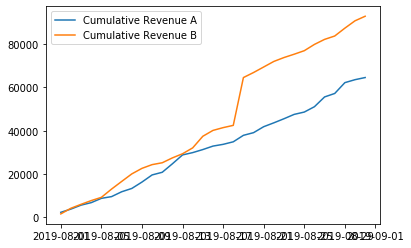

In [54]:
#original calculation
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Cumulative Revenue A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Cumulative Revenue B')

plt.legend()

----------
<font color='green'>

## Review

Your calculations are correct :)
    
</font><font color='blue'>

Please add some extra work on graphs next time. It's important to provide title and to name axis, so anyone could understand the data you plotting :) And there are also some troubles with x-axis labels. You can use ``plt.xticks()`` to work with them. For example, you can fix overlapping with this code: ``plt.xticks(cumulativeRevenueB['date'], cumulativeRevenueB['date'], rotation=60)``. First parameter is the coordinates of your x-axis, second is the labels to print, and with ``rotation=60`` your labels would be at an angle of 60.
    
</font>

---------

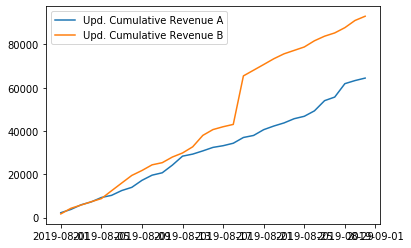

In [55]:
#updated woth correct_group
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA_new['date'], cumulativeRevenueA_new['revenue'], label='Upd. Cumulative Revenue A')

# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB_new['date'], cumulativeRevenueB_new['revenue'], label='Upd. Cumulative Revenue B')

plt.legend()

Original Conclusion: Group B is out performing group A by a large margin with respect to revenue.

New Conclusion: The graphs are so similar, I went back and found out the change in revenue for the two groups. 

Group A decreased by 132.20 and Group B increased by the same amount. Further revision of my existing work is not going to change the outcome.

In [56]:
revenueByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue': 'sum'})

revenueByUsersA.columns = ['visitorId', 'transactionId', 'revenue']

#print(revenueByUsersA)

revenueByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique, 'revenue': 'sum'})

revenueByUsersB.columns = ['visitorId', 'transactionId', 'revenue' ]

#print(revenueByUsersB)

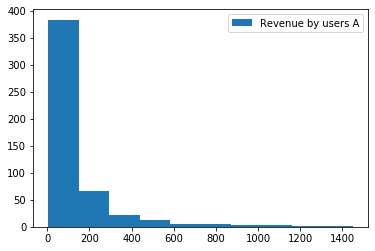

In [84]:
plt.hist(revenueByUsersA['revenue'],label='Revenue by users A')
plt.legend()

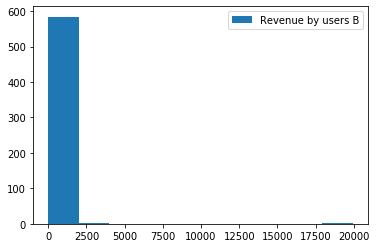

In [85]:
plt.hist(revenueByUsersB['revenue'], label='Revenue by users B')
plt.legend()

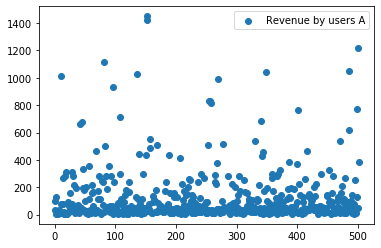

In [86]:
x_values = pd.Series(range(0, len(revenueByUsersA['revenue'])))
plt.scatter(x_values, revenueByUsersA['revenue'], label='Revenue by users A')
plt.legend()

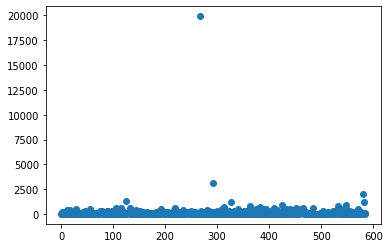

In [89]:
x_values = pd.Series(range(0, len(revenueByUsersB['revenue'])))
plt.scatter(x_values, revenueByUsersB['revenue'])#, label='Revenue by users B') 
#label made it less obvious that there is only one dot way up in the 20,000 area
#plt.legend()

Conclusion: There is clearly one order at the 20,000 mark that could skew the results of the A/B test.

----------
<font color='green'>

## Review

True :)
    
</font>

---------

#### 2. Graph cumulative average order size by group. Make conclusions and conjectures.

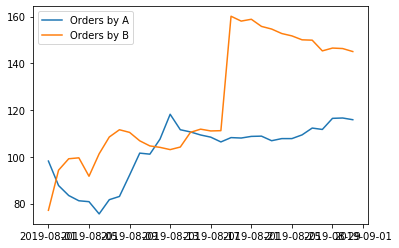

In [61]:
#Let's plot average purchase size by group. We'll divide cumulative revenue by the cumulative number of orders:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='Orders by A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='Orders by B')
plt.legend()

Conclusion: Group B makes larger orders than group A.

#### 3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

In [62]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.columns = ['date', 'revenueA', 'ordersA', 'revenueB', 'ordersB']
#mergedCumulativeRevenue.head()

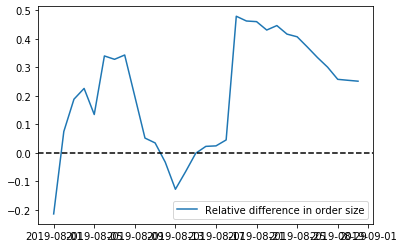

In [63]:
# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, label='Relative difference in order size')
# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

Conclusion: There were a few sudden and considerable changes. Maybe they have to do with abnormally large purchases.

#### 4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [64]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
#print(cumulativeData)

In [65]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

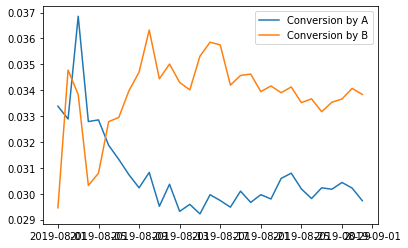

In [66]:
# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='Conversion by A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='Conversion by B')
plt.legend()

Conclusion: Initially both groups show high conversion rates, then sharply decline. Group B rises steadily after the drop and remains high. Group A never pulls out of the slump and conversion/spending never recovers.

#### 5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [67]:
#I dont think we need to split into A and B
ordersByUsers = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.count})
ordersByUsers.columns = ['visitorId', 'transactionId']
#print(ordersByUsers.sort_values(by='transactionId',ascending=False).head(15))

In [68]:
ordersByUsers_B = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.count})
ordersByUsers_B.columns = ['visitorId', 'transactionId']
#print(ordersByUsers_B.sort_values(by='transactionId',ascending=False).head(15))

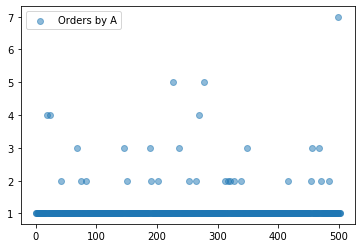

In [69]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactionId'], alpha=.5, label='Orders by A')
plt.legend()

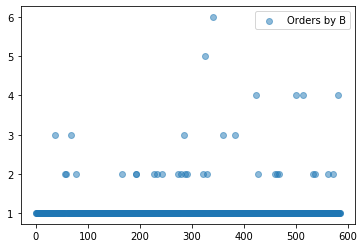

In [70]:
x_values = pd.Series(range(0,len(ordersByUsers_B)))

plt.scatter(x_values, ordersByUsers_B['transactionId'], alpha=.5, label='Orders by B')
plt.legend()

Conclusion: Most users make one purchase. The single users who made 5, 6 and 7 orders are anamolies.

#### 6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [71]:
print(np.percentile(ordersByUsers['transactionId'], [95, 99]))

[2.   3.98]


The anomaly is users with more than 4 orders.

----------
<font color='green'>

## Review

Good, sounds reasonable
    
</font>

---------

#### 7. Plot a scatter chart of order prices. Make conclusions and conjectures.

In [72]:
print(orders.sort_values(by='revenue',ascending=False).head())

      transactionId   visitorId       date  revenue group correct_group
425       590470918  1920142716 2019-08-19  19920.4     B             B
1196     3936777065  2108080724 2019-08-15   3120.1     B             B
858       192721366  1316129916 2019-08-27   1450.2     A             A
1136      666610489  1307669133 2019-08-13   1425.8     A             A
744      3668308183   888512513 2019-08-27   1335.6     B             B


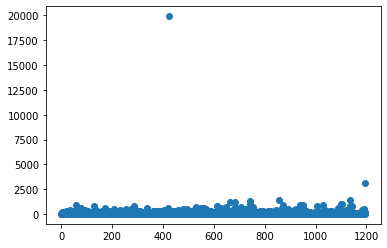

In [73]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.scatter(x_values, orders['revenue'])

Conclusion: The $20,000 order is causing Group B to appear as if they are the leaders in conversion and spending.

##### A quick recap of revenue by group:
group_A revenue is: 64554.90    
correct_group_A revenue is: 64422.70    

group_B revenue is: 92840.60     
correct_group_B revenue is: 92972.80  

##### Subtract this large order from correct_group B revenue.    
one huge order of 19920.40 in group B

##### "Revised" group B revenue
92972.80 - 19920.40 = 73052.40
##### Subtract A from revised B 
73052.40 - 64422.70 = 8629.70
difference is 8629.70

Updated Conclusion: Even if the $20,000 is removed from Group B revenue, Group B is still larger.

#### 8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [74]:
print(np.percentile(orders['revenue'], [95, 99]))

[435.54  900.904]


The anomaly is orders greater than 900.90.

#### 9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [75]:
transactionIdByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
transactionIdByUsersA.columns = ['visitorId', 'transactionId']
#transactionIdByUsersA

In [76]:
transactionIdByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
transactionIdByUsersB.columns = ['visitorId', 'transactionId']
#transactionIdByUsersB

In [77]:
sampleA = pd.concat([transactionIdByUsersA['transactionId'],
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() 
                                            - len(transactionIdByUsersA['transactionId'])), name='transactionId')],axis=0)

sampleB = pd.concat([transactionIdByUsersB['transactionId'],
                     pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() 
                                            - len(transactionIdByUsersB['transactionId'])), name='transactionId')],axis=0)

In [78]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


Null Hypothesis: There is not a statistically significant difference in conversion between the groups.

Conclusion: The first row of the output gives us the p-value, 0.008, which is less than 0.05. 

We reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. 

The relative gain of group B is 13.8% (the second row of the output). 

#### 10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

In [79]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.346
0.252


Null Hypothesis: There is no difference in average order size between the groups.

Conclusion: The p-value is considerably higher than 0.05, so we can't reject the null hypothesis. 

The average order size for group B is 25.2% larger than it is for group A. 

#### 11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [80]:
#identifying data to be filtered - GREATER THAN 4
usersWithManyOrders = pd.concat([transactionIdByUsersA[transactionIdByUsersA['transactionId'] > 4]['visitorId'], transactionIdByUsersB[transactionIdByUsersB['transactionId'] > 4]['visitorId']], axis = 0)

usersWithExpensiveOrders = orders[orders['revenue'] > 900.70]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

print(abnormalUsers.head())
print(abnormalUsers.shape)

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64
(15,)


We have 15 anomalous users.

In [81]:
sampleAFiltered = pd.concat([transactionIdByUsersA[np.logical_not(transactionIdByUsersA['visitorId'].isin(abnormalUsers))]['transactionId'],pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visits'].sum() - len(transactionIdByUsersA['transactionId'])),name='transactionId')],axis=0)

sampleBFiltered = pd.concat([transactionIdByUsersB[np.logical_not(transactionIdByUsersB['visitorId'].isin(abnormalUsers))]['transactionId'],pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visits'].sum() - len(transactionIdByUsersB['transactionId'])),name='transactionId')],axis=0)

In [82]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.153


Null Hypothesis: There is no difference in conversion between the groups. The conversion rates are the same.

Conclusion: The results for conversion almost didn't change. The raw p-value is 0.008 and the filtered p-value is 0.007. 
We reject the null hypothesis that conversion rates are the same between the groups.

The raw increase of group B is 13.8%, the filtered result is 15.3%.

#### 12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

In [83]:
#The results for conversion almost didn't change. Let's see what happens to the values for average order size:

print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))


0.410
-0.006


Conclusion: The p-value is greater than .05, so again we cant reject the null hypothesis.

However, the average order size of Group B is now much less than Group A.

----------
<font color='green'>

## Review

A correct work on hypotheses testing :)
    
</font>

---------

### Analyze the Results

#### Make a decision based on the test results. The possible decisions are:
Stop the test, consider one of the groups the leader.

Stop the test, conclude that there is no difference between the groups.

Continue the test.

Conclusion: Stop the test, group B is the leader. Even after removing one extreme outlier order of 19920.40, group B was still the leader in revenue. There is also no evidence that this is not a legitimate purchase. Perhaps this user is a very generous person and was buying gifts.

Using filtered data, the average order size changed significantly and B fell behind group A. I think overall, group B is still the leader, just not by such a large margin as it originally appeared.

----------
<font color='green'>

## Review

Great, your conclusions are consistent with the observations
    
</font>

---------